In [1]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# 设置超参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""

# 数据增强与加载
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

num_classes = len(train_dataset.classes)

# 初始化VGG-16
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)

# 损失与优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 训练
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch}/{num_epochs}], Loss: {total_loss:.4f}")

    # 每5轮保存模型
    if epoch % save_every == 0:
        torch.save(model.state_dict(), f"checkpointvgg/vgg16_epoch{epoch}.pth")


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\30419/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [04:19<00:00, 2.13MB/s

KeyboardInterrupt: 

In [2]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # 导入 tqdm 用于进度条

# 设置超参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 请填写你的数据路径，例如 "data/fish"
model_dir = "checkpointvgg"
os.makedirs(model_dir, exist_ok=True)

# 数据增强与加载
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

num_classes = len(train_dataset.classes)

# 初始化VGG-16
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)

# 损失与优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 训练
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch [{epoch}/{num_epochs}], Loss: {total_loss:.4f}")

    # 每5轮保存模型
    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vgg16_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")


Epoch 1/30: 100%|██████████████████████████████████████| 275/275 [07:17<00:00,  1.59s/it, loss=0.92]


Epoch [1/30], Loss: 367.5991


Epoch 2/30: 100%|█████████████████████████████████████| 275/275 [07:08<00:00,  1.56s/it, loss=0.276]


Epoch [2/30], Loss: 122.0071


Epoch 3/30: 100%|█████████████████████████████████████| 275/275 [07:10<00:00,  1.56s/it, loss=0.336]


Epoch [3/30], Loss: 59.6617


Epoch 4/30: 100%|█████████████████████████████████████| 275/275 [07:06<00:00,  1.55s/it, loss=0.169]


Epoch [4/30], Loss: 35.5864


Epoch 5/30: 100%|████████████████████████████████████| 275/275 [07:08<00:00,  1.56s/it, loss=0.0691]


Epoch [5/30], Loss: 34.3012
Saved model at checkpointvgg\vgg16_epoch5.pth


Epoch 6/30: 100%|████████████████████████████████████| 275/275 [07:02<00:00,  1.54s/it, loss=0.0199]


Epoch [6/30], Loss: 24.6369


Epoch 7/30: 100%|████████████████████████████████████| 275/275 [07:03<00:00,  1.54s/it, loss=0.0801]


Epoch [7/30], Loss: 21.9458


Epoch 8/30: 100%|█████████████████████████████████████| 275/275 [16:21<00:00,  3.57s/it, loss=0.164]


Epoch [8/30], Loss: 16.3842


Epoch 9/30: 100%|█████████████████████████████████████| 275/275 [07:17<00:00,  1.59s/it, loss=0.102]


Epoch [9/30], Loss: 17.5528


Epoch 10/30: 100%|████████████████████████████████████| 275/275 [07:08<00:00,  1.56s/it, loss=0.103]


Epoch [10/30], Loss: 19.8589
Saved model at checkpointvgg\vgg16_epoch10.pth


Epoch 11/30: 100%|████████████████████████████████████| 275/275 [07:42<00:00,  1.68s/it, loss=0.175]


Epoch [11/30], Loss: 19.6533


Epoch 12/30: 100%|███████████████████████████████████| 275/275 [07:34<00:00,  1.65s/it, loss=0.0292]


Epoch [12/30], Loss: 15.0396


Epoch 13/30: 100%|█████████████████████████████████| 275/275 [07:14<00:00,  1.58s/it, loss=0.000899]


Epoch [13/30], Loss: 15.8768


Epoch 14/30: 100%|██████████████████████████████████| 275/275 [07:04<00:00,  1.54s/it, loss=0.00449]


Epoch [14/30], Loss: 10.4616


Epoch 15/30: 100%|███████████████████████████████████| 275/275 [07:43<00:00,  1.69s/it, loss=0.0527]


Epoch [15/30], Loss: 15.5911
Saved model at checkpointvgg\vgg16_epoch15.pth


Epoch 16/30: 100%|██████████████████████████████████| 275/275 [07:51<00:00,  1.71s/it, loss=0.00712]


Epoch [16/30], Loss: 13.4452


Epoch 17/30: 100%|████████████████████████████████████| 275/275 [07:51<00:00,  1.71s/it, loss=0.158]


Epoch [17/30], Loss: 18.1779


Epoch 18/30: 100%|███████████████████████████████████| 275/275 [07:47<00:00,  1.70s/it, loss=0.0785]


Epoch [18/30], Loss: 10.7758


Epoch 19/30: 100%|███████████████████████████████████| 275/275 [08:00<00:00,  1.75s/it, loss=0.0021]


Epoch [19/30], Loss: 12.9119


Epoch 20/30: 100%|█████████████████████████████████| 275/275 [07:47<00:00,  1.70s/it, loss=0.000813]


Epoch [20/30], Loss: 13.4193
Saved model at checkpointvgg\vgg16_epoch20.pth


Epoch 21/30: 100%|███████████████████████████████████| 275/275 [08:26<00:00,  1.84s/it, loss=0.0017]


Epoch [21/30], Loss: 9.8891


Epoch 22/30: 100%|███████████████████████████████████| 275/275 [08:40<00:00,  1.89s/it, loss=0.0544]


Epoch [22/30], Loss: 11.1790


Epoch 23/30: 100%|████████████████████████████████████| 275/275 [08:50<00:00,  1.93s/it, loss=0.107]


Epoch [23/30], Loss: 7.0103


Epoch 24/30: 100%|██████████████████████████████████| 275/275 [08:49<00:00,  1.93s/it, loss=0.00156]


Epoch [24/30], Loss: 12.5258


Epoch 25/30: 100%|█████████████████████████████████| 275/275 [08:58<00:00,  1.96s/it, loss=0.000832]


Epoch [25/30], Loss: 5.0017
Saved model at checkpointvgg\vgg16_epoch25.pth


Epoch 26/30: 100%|██████████████████████████████████| 275/275 [08:33<00:00,  1.87s/it, loss=0.00108]


Epoch [26/30], Loss: 3.8102


Epoch 27/30: 100%|█████████████████████████████████| 275/275 [08:56<00:00,  1.95s/it, loss=0.000825]


Epoch [27/30], Loss: 10.5277


Epoch 28/30: 100%|██████████████████████████████████| 275/275 [08:06<00:00,  1.77s/it, loss=5.29e-5]


Epoch [28/30], Loss: 8.4665


Epoch 29/30: 100%|█████████████████████████████████| 275/275 [07:52<00:00,  1.72s/it, loss=0.000715]


Epoch [29/30], Loss: 13.1826


Epoch 30/30: 100%|███████████████████████████████████| 275/275 [07:51<00:00,  1.71s/it, loss=0.0106]


Epoch [30/30], Loss: 7.9713
Saved model at checkpointvgg\vgg16_epoch30.pth


==== 开始评估模型 ====



Evaluating: 100%|██████████████████████████████████| 55/55 [00:19<00:00,  2.87it/s, accuracy=0.9506]


vgg16_epoch_5.pth - 测试集准确率: 0.9506



Evaluating: 100%|██████████████████████████████████| 55/55 [00:18<00:00,  3.04it/s, accuracy=0.9568]


vgg16_epoch_10.pth - 测试集准确率: 0.9568



Evaluating: 100%|██████████████████████████████████| 55/55 [00:18<00:00,  3.00it/s, accuracy=0.9659]


vgg16_epoch_15.pth - 测试集准确率: 0.9659



Evaluating: 100%|██████████████████████████████████| 55/55 [00:18<00:00,  2.91it/s, accuracy=0.9699]


vgg16_epoch_20.pth - 测试集准确率: 0.9699



Evaluating: 100%|██████████████████████████████████| 55/55 [00:18<00:00,  2.95it/s, accuracy=0.9761]


vgg16_epoch_25.pth - 测试集准确率: 0.9761



Evaluating: 100%|██████████████████████████████████| 55/55 [00:19<00:00,  2.81it/s, accuracy=0.9682]


vgg16_epoch_30.pth - 测试集准确率: 0.9682


准确率曲线已保存为 'vgg16_accuracy_curve.png'


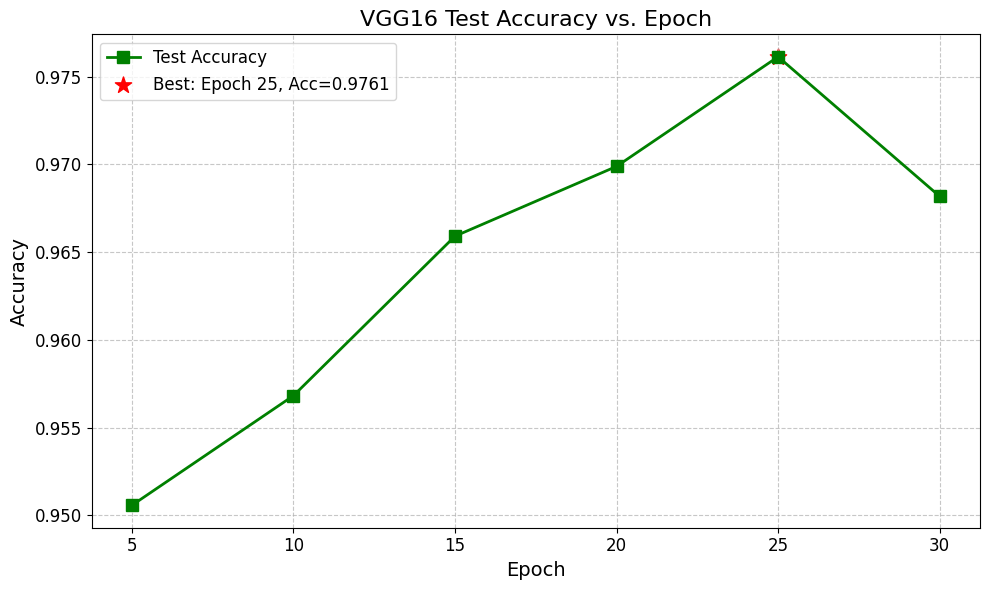


==== 最佳模型结果 ====
Epoch 25: 最高准确率 0.9761


In [4]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt

# 参数设置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
data_dir = ""  # 设置为你的数据路径
model_dir = "checkpointvgg"  # 你的模型保存路径

# 图像预处理（要与训练时保持一致）
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 加载测试数据
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
num_classes = len(test_dataset.classes)

# 初始化模型结构
model = models.vgg16(pretrained=False)
model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)

# 评估函数（带进度条）
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc="Evaluating", ncols=100)
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            progress_bar.set_postfix(accuracy=f"{(correct/total):.4f}")

    return correct / total

# 查找所有模型文件并评估
model_paths = sorted(glob.glob(os.path.join(model_dir, "*.pth")), 
                    key=lambda x: int(x.split('_')[-1].split('.')[0]))  # 按epoch数字排序

# 存储结果
results = []
print("==== 开始评估模型 ====\n")
for path in model_paths:
    model.load_state_dict(torch.load(path, map_location=device))
    # 从文件名中提取epoch信息（适配vgg16_epoch_X.pth格式）
    epoch = int(os.path.basename(path).split('_')[-1].split('.')[0])
    acc = evaluate_model(model, test_loader)
    results.append((epoch, acc))
    print(f"{os.path.basename(path)} - 测试集准确率: {acc:.4f}\n")

# 按epoch排序结果
results.sort(key=lambda x: x[0])

# ==== 绘制准确率曲线 ====
plt.figure(figsize=(10, 6))
epochs, accuracies = zip(*results)
plt.plot(epochs, accuracies, 'g-s', linewidth=2, markersize=8, label='Test Accuracy')

# 设置图表标题和标签
plt.title('VGG16 Test Accuracy vs. Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# 标记最高准确率点
best_epoch, best_acc = max(results, key=lambda x: x[1])
plt.scatter(best_epoch, best_acc, c='red', s=150, marker='*', 
            label=f'Best: Epoch {best_epoch}, Acc={best_acc:.4f}')
plt.legend(fontsize=12)

# 设置x轴刻度为所有评估的epoch
plt.xticks(epochs, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 保存和显示图像
plt.savefig('vgg16_accuracy_curve.png', dpi=300, bbox_inches='tight')
print("\n准确率曲线已保存为 'vgg16_accuracy_curve.png'")
plt.show()

# 打印最佳结果
print("\n==== 最佳模型结果 ====")
print(f"Epoch {best_epoch}: 最高准确率 {best_acc:.4f}")

In [2]:
import os
import re
import glob
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==== 配置 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 修改为你的数据目录
model_dir = "checkpointvggnew"
log_file = "vgg16-log.txt"
os.makedirs(model_dir, exist_ok=True)

# ==== 日志函数 ====
def write_log(msg, log_file=log_file):
    with open(log_file, "a") as f:
        f.write(msg + "\n")

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
num_classes = len(train_dataset.classes)

# ==== 初始化 VGG16 ====
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ==== 训练 ====
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    avg_loss = total_loss / len(train_loader)
    acc = correct / total
    log_msg = f"Epoch [{epoch}/{num_epochs}] Complete - Loss: {avg_loss:.4f}, Accuracy: {acc:.4f}"
    print(log_msg)
    write_log(log_msg)

    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vgg16_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")

# ==== 测试集评估 ====
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

write_log("=== Evaluating Saved Models ===", log_file)
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, val_loader)
    filename = os.path.basename(path)
    epoch_num = int(re.search(r'epoch(\d+)', filename).group(1))
    write_log(f"vgg16_epoch{epoch_num}.pth - Test Accuracy: {acc:.4f}", log_file)

# ==== 日志解析函数 ====
def parse_log_file(log_file):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    test_epochs = []

    train_pattern = re.compile(r"Epoch \[(\d+)/\d+\] Complete - Loss: (\d+\.\d+), Accuracy: (\d+\.\d+)")
    test_pattern = re.compile(r"vgg16_epoch(\d+)\.pth - Test Accuracy: (\d+\.\d+)")

    with open(log_file, 'r') as f:
        for line in f:
            train_match = train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                acc = float(train_match.group(3))

                if epoch == len(train_losses) + 1:
                    train_losses.append(loss)
                    train_accuracies.append(acc)
                else:
                    print(f"Warning: Epoch {epoch} out of sequence")

            test_match = test_pattern.search(line)
            if test_match:
                epoch = int(test_match.group(1))
                test_acc = float(test_match.group(2))
                test_epochs.append(epoch)
                test_accuracies.append(test_acc)

    if test_accuracies:
        test_data = sorted(zip(test_epochs, test_accuracies))
        sorted_test_epochs, sorted_test_accuracies = zip(*test_data)
    else:
        sorted_test_epochs, sorted_test_accuracies = [], []

    return train_losses, train_accuracies, sorted_test_epochs, sorted_test_accuracies

# ==== 绘图 ====
train_losses, train_accuracies, test_epochs, test_accuracies = parse_log_file(log_file)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
if test_epochs:
    plt.plot(test_epochs, test_accuracies, marker='o', color='red')
    plt.title("Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
else:
    plt.title("Test Accuracy (No Data Found)")

plt.tight_layout()
plt.savefig("training_test_curves.png")
plt.show()


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/30:  46%|████████████▎              | 126/275 [03:50<04:32,  1.83s/it, acc=0.467, loss=1.24]


KeyboardInterrupt: 

In [1]:
import torch
print(f"PyTorch版本: {torch.__version__}")
print(f"CUDA可用: {torch.cuda.is_available()}")
print(f"当前设备: {torch.cuda.current_device()}")
print(f"设备名称: {torch.cuda.get_device_name(0)}")
print(f"CUDA版本: {torch.version.cuda}")

PyTorch版本: 2.7.0+cu128
CUDA可用: True
当前设备: 0
设备名称: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA版本: 12.8


十分之一训练集训练

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/30: 100%|████████████████████████████████████████| 28/28 [01:55<00:00,  4.14s/it, loss=3.38]


Epoch [1/30] - Loss: 2.9579, Train Acc: 0.2184, Test Acc: 0.3892


Epoch 2/30: 100%|████████████████████████████████████████| 28/28 [01:58<00:00,  4.24s/it, loss=1.14]


Epoch [2/30] - Loss: 1.7735, Train Acc: 0.4869, Test Acc: 0.5608


Epoch 3/30: 100%|███████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.915]


Epoch [3/30] - Loss: 0.9830, Train Acc: 0.6997, Test Acc: 0.6511


Epoch 4/30: 100%|███████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.406]


Epoch [4/30] - Loss: 0.5004, Train Acc: 0.8578, Test Acc: 0.6653


Epoch 5/30: 100%|███████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.238]


Epoch [5/30] - Loss: 0.3004, Train Acc: 0.9158, Test Acc: 0.7250
Saved model at checkpoint_vgg-1\vgg16_epoch5.pth


Epoch 6/30: 100%|████████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.13]


Epoch [6/30] - Loss: 0.1190, Train Acc: 0.9681, Test Acc: 0.6693


Epoch 7/30: 100%|██████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.0177]


Epoch [7/30] - Loss: 0.0870, Train Acc: 0.9795, Test Acc: 0.6972


Epoch 8/30: 100%|██████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.0636]


Epoch [8/30] - Loss: 0.0753, Train Acc: 0.9784, Test Acc: 0.6506


Epoch 9/30: 100%|██████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.0515]


Epoch [9/30] - Loss: 0.0555, Train Acc: 0.9841, Test Acc: 0.7028


Epoch 10/30: 100%|████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.00344]


Epoch [10/30] - Loss: 0.0508, Train Acc: 0.9863, Test Acc: 0.7369
Saved model at checkpoint_vgg-1\vgg16_epoch10.pth


Epoch 11/30: 100%|██████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.177]


Epoch [11/30] - Loss: 0.0630, Train Acc: 0.9863, Test Acc: 0.7148


Epoch 12/30: 100%|██████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.311]


Epoch [12/30] - Loss: 0.0672, Train Acc: 0.9772, Test Acc: 0.7011


Epoch 13/30: 100%|█████████████████████████████████████| 28/28 [01:58<00:00,  4.23s/it, loss=0.0178]


Epoch [13/30] - Loss: 0.1746, Train Acc: 0.9511, Test Acc: 0.7000


Epoch 14/30: 100%|████████████████████████████████████| 28/28 [01:58<00:00,  4.24s/it, loss=0.00353]


Epoch [14/30] - Loss: 0.0484, Train Acc: 0.9863, Test Acc: 0.7222


Epoch 15/30: 100%|████████████████████████████████████| 28/28 [01:59<00:00,  4.26s/it, loss=0.00277]


Epoch [15/30] - Loss: 0.0390, Train Acc: 0.9898, Test Acc: 0.6574
Saved model at checkpoint_vgg-1\vgg16_epoch15.pth


Epoch 16/30: 100%|█████████████████████████████████████| 28/28 [01:55<00:00,  4.14s/it, loss=0.0336]


Epoch [16/30] - Loss: 0.0960, Train Acc: 0.9772, Test Acc: 0.7227


Epoch 17/30: 100%|█████████████████████████████████████| 28/28 [01:55<00:00,  4.13s/it, loss=0.0296]


Epoch [17/30] - Loss: 0.0085, Train Acc: 0.9989, Test Acc: 0.7426


Epoch 18/30: 100%|█████████████████████████████████████| 28/28 [01:55<00:00,  4.13s/it, loss=0.0013]


Epoch [18/30] - Loss: 0.0081, Train Acc: 0.9966, Test Acc: 0.7341


Epoch 19/30: 100%|████████████████████████████████████| 28/28 [01:55<00:00,  4.13s/it, loss=1.67e-5]


Epoch [19/30] - Loss: 0.0179, Train Acc: 0.9954, Test Acc: 0.7301


Epoch 20/30: 100%|███████████████████████████████████| 28/28 [01:55<00:00,  4.13s/it, loss=0.000343]


Epoch [20/30] - Loss: 0.0182, Train Acc: 0.9920, Test Acc: 0.7165
Saved model at checkpoint_vgg-1\vgg16_epoch20.pth


Epoch 21/30: 100%|██████████████████████████████████████| 28/28 [01:55<00:00,  4.13s/it, loss=0.416]


Epoch [21/30] - Loss: 0.0437, Train Acc: 0.9863, Test Acc: 0.7205


Epoch 22/30: 100%|██████████████████████████████████████| 28/28 [01:55<00:00,  4.13s/it, loss=0.106]


Epoch [22/30] - Loss: 0.0708, Train Acc: 0.9818, Test Acc: 0.6443


Epoch 23/30: 100%|█████████████████████████████████████| 28/28 [01:55<00:00,  4.12s/it, loss=0.0644]


Epoch [23/30] - Loss: 0.0872, Train Acc: 0.9807, Test Acc: 0.6886


Epoch 24/30: 100%|███████████████████████████████████| 28/28 [01:58<00:00,  4.25s/it, loss=0.000151]


Epoch [24/30] - Loss: 0.0372, Train Acc: 0.9841, Test Acc: 0.6841


Epoch 25/30: 100%|█████████████████████████████████████| 28/28 [02:00<00:00,  4.30s/it, loss=0.0189]


Epoch [25/30] - Loss: 0.0772, Train Acc: 0.9738, Test Acc: 0.7233
Saved model at checkpoint_vgg-1\vgg16_epoch25.pth


Epoch 26/30: 100%|███████████████████████████████████| 28/28 [01:54<00:00,  4.08s/it, loss=0.000148]


Epoch [26/30] - Loss: 0.0137, Train Acc: 0.9966, Test Acc: 0.7261


Epoch 27/30: 100%|███████████████████████████████████| 28/28 [02:00<00:00,  4.32s/it, loss=0.000446]


Epoch [27/30] - Loss: 0.0064, Train Acc: 0.9966, Test Acc: 0.7182


Epoch 28/30: 100%|████████████████████████████████████| 28/28 [02:02<00:00,  4.39s/it, loss=0.00411]


Epoch [28/30] - Loss: 0.0042, Train Acc: 0.9977, Test Acc: 0.7386


Epoch 29/30: 100%|███████████████████████████████████| 28/28 [02:02<00:00,  4.36s/it, loss=0.000499]


Epoch [29/30] - Loss: 0.0006, Train Acc: 1.0000, Test Acc: 0.7341


Epoch 30/30: 100%|████████████████████████████████████| 28/28 [02:01<00:00,  4.35s/it, loss=3.68e-5]


Epoch [30/30] - Loss: 0.0002, Train Acc: 1.0000, Test Acc: 0.7392
Saved model at checkpoint_vgg-1\vgg16_epoch30.pth

=== Evaluating Final Model on Test Set ===
Final Test Accuracy: 0.7392


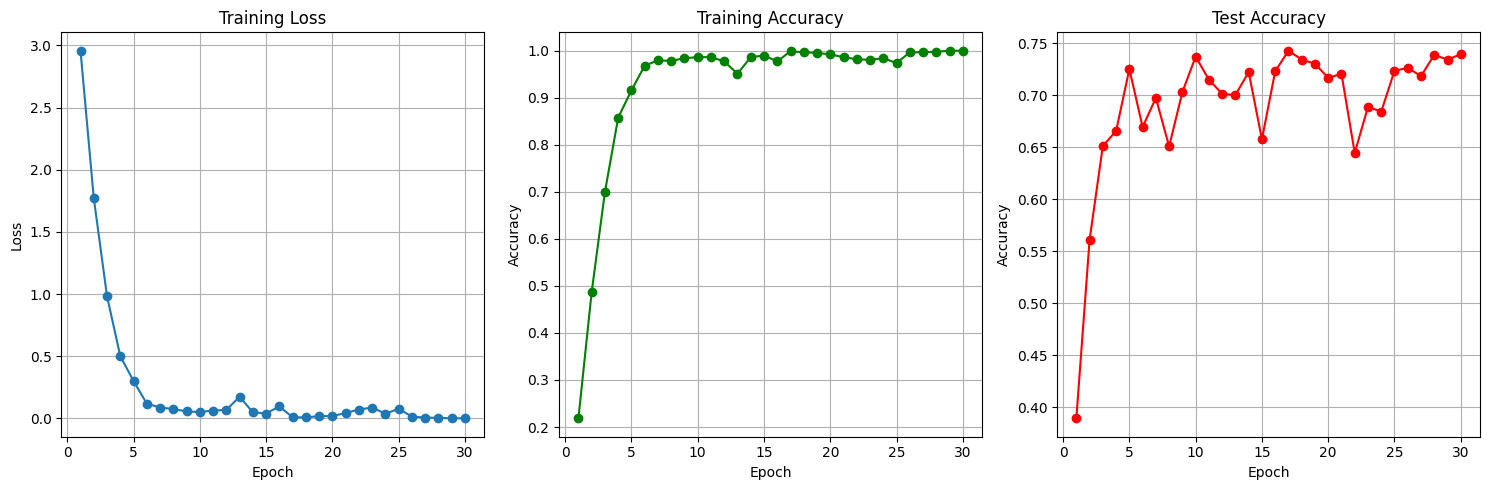

In [2]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==== 设置路径和超参数 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 请填写你的数据路径
model_dir = "checkpoint_vgg-1"
os.makedirs(model_dir, exist_ok=True)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# ==== 加载完整训练集 ====
full_train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
targets = full_train_dataset.targets

# ==== 从训练集中抽取10%用于训练 ====
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9, random_state=42)
for train_idx, _ in sss.split(torch.zeros(len(targets)), targets):
    reduced_train_dataset = Subset(full_train_dataset, train_idx)

train_loader = DataLoader(reduced_train_dataset, batch_size=batch_size, shuffle=True)

# ==== 加载测试集（替代验证集使用） ====
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 类别数 ====
num_classes = len(full_train_dataset.classes)

# ==== 初始化模型 ====
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)

# ==== 损失函数和优化器 ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ==== 记录训练过程 ====
train_losses = []
train_accuracies = []
test_accuracies = []

# ==== 准确率计算函数 ====
def evaluate_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 训练过程 ====
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    correct, total = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item())

    # ==== 每轮后评估 ====
    epoch_loss = total_loss / len(train_loader)
    epoch_train_acc = correct / total
    epoch_test_acc = evaluate_accuracy(model, test_loader)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_train_acc)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch [{epoch}/{num_epochs}] - Loss: {epoch_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, Test Acc: {epoch_test_acc:.4f}")

    # 保存模型
    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vgg16_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")

# ==== 最终评估 ====
print("\n=== Evaluating Final Model on Test Set ===")
final_test_acc = evaluate_accuracy(model, test_loader)
print(f"Final Test Accuracy: {final_test_acc:.4f}")

# ==== 绘图 ====
plt.figure(figsize=(15, 5))

# Loss 曲线
plt.subplot(1, 3, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Train Accuracy 曲线
plt.subplot(1, 3, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Test Accuracy 曲线（替代 Validation）
plt.subplot(1, 3, 3)
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='red')
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("training_test_curves.png")
plt.show()


In [1]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
from tqdm import tqdm

# ==== 设置路径和参数 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
data_dir = ""  # 请填写你的数据路径
model_dir = "checkpoint_vgg-1"  # 模型保存目录

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# ==== 加载测试集 ====
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 类别数 ====
num_classes = len(test_dataset.classes)

# ==== 准确率计算函数 ====
def evaluate_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Evaluating", ncols=100):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 测试所有保存的模型 ====
def test_all_models():
    # 获取所有保存的模型文件
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.pth')]
    model_files.sort()  # 按epoch排序
    
    # 初始化模型结构
    model = models.vgg16(pretrained=False)
    model.classifier[6] = nn.Linear(4096, num_classes)
    model = model.to(device)
    
    print("\n=== Testing All Saved Models ===")
    print(f"Found {len(model_files)} models to test\n")
    
    results = []
    
    for model_file in model_files:
        # 提取epoch信息
        epoch = int(model_file.split('epoch')[1].split('.')[0])
        
        # 加载模型权重
        model_path = os.path.join(model_dir, model_file)
        model.load_state_dict(torch.load(model_path))
        
        # 评估模型
        accuracy = evaluate_accuracy(model, test_loader)
        results.append((epoch, accuracy))
        
        print(f"Model {model_file} - Test Accuracy: {accuracy:.4f}")
    
    # 打印结果总结
    print("\n=== Test Results Summary ===")
    for epoch, acc in sorted(results, key=lambda x: x[0]):
        print(f"Epoch {epoch:3d}: Test Accuracy = {acc:.4f}")
    
    # 找到最佳模型
    best_epoch, best_acc = max(results, key=lambda x: x[1])
    print(f"\nBest model: Epoch {best_epoch} with accuracy {best_acc:.4f}")

if __name__ == "__main__":
    test_all_models()

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



=== Testing All Saved Models ===
Found 6 models to test



Evaluating: 100%|███████████████████████████████████████████████████| 55/55 [00:20<00:00,  2.67it/s]


Model vgg16_epoch10.pth - Test Accuracy: 0.7369


Evaluating: 100%|███████████████████████████████████████████████████| 55/55 [00:19<00:00,  2.81it/s]


Model vgg16_epoch15.pth - Test Accuracy: 0.6574


Evaluating: 100%|███████████████████████████████████████████████████| 55/55 [00:18<00:00,  3.00it/s]


Model vgg16_epoch20.pth - Test Accuracy: 0.7165


Evaluating: 100%|███████████████████████████████████████████████████| 55/55 [00:18<00:00,  2.99it/s]


Model vgg16_epoch25.pth - Test Accuracy: 0.7233


Evaluating: 100%|███████████████████████████████████████████████████| 55/55 [00:18<00:00,  3.03it/s]


Model vgg16_epoch30.pth - Test Accuracy: 0.7392


Evaluating: 100%|███████████████████████████████████████████████████| 55/55 [00:18<00:00,  2.96it/s]

Model vgg16_epoch5.pth - Test Accuracy: 0.7250

=== Test Results Summary ===
Epoch   5: Test Accuracy = 0.7250
Epoch  10: Test Accuracy = 0.7369
Epoch  15: Test Accuracy = 0.6574
Epoch  20: Test Accuracy = 0.7165
Epoch  25: Test Accuracy = 0.7233
Epoch  30: Test Accuracy = 0.7392

Best model: Epoch 30 with accuracy 0.7392


增强之后的数据集训练（需要更改）

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[2025-04-30 00:18:05] --- Epoch [1/30] ---


Training Epoch 1: 100%|████████████████████| 138/138 [07:47<00:00,  3.39s/it, acc=0.457, loss=0.728]


[2025-04-30 00:25:52] Epoch [1/30] Complete - Loss: 1.9294, Accuracy: 0.4571
[2025-04-30 00:25:52] --- Epoch [2/30] ---


Training Epoch 2: 100%|████████████████████| 138/138 [07:43<00:00,  3.36s/it, acc=0.826, loss=0.714]


[2025-04-30 00:33:36] Epoch [2/30] Complete - Loss: 0.5514, Accuracy: 0.8262
[2025-04-30 00:33:36] --- Epoch [3/30] ---


Training Epoch 3: 100%|████████████████████| 138/138 [07:43<00:00,  3.36s/it, acc=0.934, loss=0.226]


[2025-04-30 00:41:19] Epoch [3/30] Complete - Loss: 0.2262, Accuracy: 0.9336
[2025-04-30 00:41:19] --- Epoch [4/30] ---


Training Epoch 4: 100%|████████████████████| 138/138 [07:42<00:00,  3.35s/it, acc=0.961, loss=0.254]


[2025-04-30 00:49:02] Epoch [4/30] Complete - Loss: 0.1186, Accuracy: 0.9609
[2025-04-30 00:49:02] --- Epoch [5/30] ---


Training Epoch 5: 100%|███████████████████| 138/138 [07:41<00:00,  3.34s/it, acc=0.976, loss=0.0524]


[2025-04-30 00:56:43] Epoch [5/30] Complete - Loss: 0.0860, Accuracy: 0.9757
[2025-04-30 00:56:44] Saved model at check_improve-vgg\vgg16_epoch5.pth
[2025-04-30 00:56:44] --- Epoch [6/30] ---


Training Epoch 6: 100%|████████████████████| 138/138 [07:40<00:00,  3.34s/it, acc=0.963, loss=0.408]


[2025-04-30 01:04:25] Epoch [6/30] Complete - Loss: 0.1239, Accuracy: 0.9627
[2025-04-30 01:04:25] --- Epoch [7/30] ---


Training Epoch 7: 100%|██████████████████| 138/138 [07:40<00:00,  3.34s/it, acc=0.99, loss=0.000342]


[2025-04-30 01:12:05] Epoch [7/30] Complete - Loss: 0.0365, Accuracy: 0.9898
[2025-04-30 01:12:05] --- Epoch [8/30] ---


Training Epoch 8: 100%|████████████████████| 138/138 [07:40<00:00,  3.34s/it, acc=0.983, loss=0.019]


[2025-04-30 01:19:46] Epoch [8/30] Complete - Loss: 0.0576, Accuracy: 0.9832
[2025-04-30 01:19:46] --- Epoch [9/30] ---


Training Epoch 9: 100%|██████████████████| 138/138 [07:40<00:00,  3.33s/it, acc=0.987, loss=0.00306]


[2025-04-30 01:27:26] Epoch [9/30] Complete - Loss: 0.0406, Accuracy: 0.9866
[2025-04-30 01:27:26] --- Epoch [10/30] ---


Training Epoch 10: 100%|██████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.989, loss=0.0111]


[2025-04-30 01:35:05] Epoch [10/30] Complete - Loss: 0.0347, Accuracy: 0.9891
[2025-04-30 01:35:06] Saved model at check_improve-vgg\vgg16_epoch10.pth
[2025-04-30 01:35:06] --- Epoch [11/30] ---


Training Epoch 11: 100%|██████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.972, loss=0.0182]


[2025-04-30 01:42:45] Epoch [11/30] Complete - Loss: 0.0935, Accuracy: 0.9718
[2025-04-30 01:42:45] --- Epoch [12/30] ---


Training Epoch 12: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.995, loss=0.00038]


[2025-04-30 01:50:25] Epoch [12/30] Complete - Loss: 0.0227, Accuracy: 0.9948
[2025-04-30 01:50:25] --- Epoch [13/30] ---


Training Epoch 13: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.999, loss=5.03e-6]


[2025-04-30 01:58:04] Epoch [13/30] Complete - Loss: 0.0030, Accuracy: 0.9991
[2025-04-30 01:58:04] --- Epoch [14/30] ---


Training Epoch 14: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.976, loss=0.00518]


[2025-04-30 02:05:44] Epoch [14/30] Complete - Loss: 0.0910, Accuracy: 0.9757
[2025-04-30 02:05:44] --- Epoch [15/30] ---


Training Epoch 15: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.976, loss=9.37e-5]


[2025-04-30 02:13:24] Epoch [15/30] Complete - Loss: 0.0870, Accuracy: 0.9757
[2025-04-30 02:13:25] Saved model at check_improve-vgg\vgg16_epoch15.pth
[2025-04-30 02:13:25] --- Epoch [16/30] ---


Training Epoch 16: 100%|██████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.991, loss=0.0269]


[2025-04-30 02:21:05] Epoch [16/30] Complete - Loss: 0.0348, Accuracy: 0.9909
[2025-04-30 02:21:05] --- Epoch [17/30] ---


Training Epoch 17: 100%|█████████████████| 138/138 [07:38<00:00,  3.32s/it, acc=0.988, loss=0.00201]


[2025-04-30 02:28:43] Epoch [17/30] Complete - Loss: 0.0380, Accuracy: 0.9882
[2025-04-30 02:28:43] --- Epoch [18/30] ---


Training Epoch 18: 100%|████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.994, loss=0.000755]


[2025-04-30 02:36:23] Epoch [18/30] Complete - Loss: 0.0287, Accuracy: 0.9936
[2025-04-30 02:36:23] --- Epoch [19/30] ---


Training Epoch 19: 100%|████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.993, loss=0.000174]


[2025-04-30 02:44:03] Epoch [19/30] Complete - Loss: 0.0232, Accuracy: 0.9934
[2025-04-30 02:44:03] --- Epoch [20/30] ---


Training Epoch 20: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.979, loss=0.00601]


[2025-04-30 02:51:42] Epoch [20/30] Complete - Loss: 0.0721, Accuracy: 0.9791
[2025-04-30 02:51:43] Saved model at check_improve-vgg\vgg16_epoch20.pth
[2025-04-30 02:51:43] --- Epoch [21/30] ---


Training Epoch 21: 100%|████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.993, loss=0.000435]


[2025-04-30 02:59:23] Epoch [21/30] Complete - Loss: 0.0258, Accuracy: 0.9934
[2025-04-30 02:59:23] --- Epoch [22/30] ---


Training Epoch 22: 100%|██████████████████| 138/138 [07:42<00:00,  3.35s/it, acc=0.988, loss=0.0942]


[2025-04-30 03:07:05] Epoch [22/30] Complete - Loss: 0.0432, Accuracy: 0.9879
[2025-04-30 03:07:05] --- Epoch [23/30] ---


Training Epoch 23: 100%|█████████████████| 138/138 [07:38<00:00,  3.33s/it, acc=0.992, loss=0.00543]


[2025-04-30 03:14:44] Epoch [23/30] Complete - Loss: 0.0369, Accuracy: 0.9918
[2025-04-30 03:14:44] --- Epoch [24/30] ---


Training Epoch 24: 100%|████████████████| 138/138 [07:38<00:00,  3.32s/it, acc=0.987, loss=0.000538]


[2025-04-30 03:22:23] Epoch [24/30] Complete - Loss: 0.0440, Accuracy: 0.9866
[2025-04-30 03:22:23] --- Epoch [25/30] ---


Training Epoch 25: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.998, loss=0.00228]


[2025-04-30 03:30:02] Epoch [25/30] Complete - Loss: 0.0099, Accuracy: 0.9982
[2025-04-30 03:30:03] Saved model at check_improve-vgg\vgg16_epoch25.pth
[2025-04-30 03:30:03] --- Epoch [26/30] ---


Training Epoch 26: 100%|████████████████| 138/138 [07:38<00:00,  3.32s/it, acc=0.996, loss=0.000355]


[2025-04-30 03:37:42] Epoch [26/30] Complete - Loss: 0.0197, Accuracy: 0.9959
[2025-04-30 03:37:42] --- Epoch [27/30] ---


Training Epoch 27: 100%|█████████████████| 138/138 [07:38<00:00,  3.32s/it, acc=0.999, loss=3.64e-5]


[2025-04-30 03:45:20] Epoch [27/30] Complete - Loss: 0.0024, Accuracy: 0.9991
[2025-04-30 03:45:20] --- Epoch [28/30] ---


Training Epoch 28: 100%|███████████████████| 138/138 [07:38<00:00,  3.32s/it, acc=0.977, loss=0.363]


[2025-04-30 03:52:59] Epoch [28/30] Complete - Loss: 0.0712, Accuracy: 0.9768
[2025-04-30 03:52:59] --- Epoch [29/30] ---


Training Epoch 29: 100%|█████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.972, loss=0.00246]


[2025-04-30 04:00:38] Epoch [29/30] Complete - Loss: 0.1062, Accuracy: 0.9720
[2025-04-30 04:00:38] --- Epoch [30/30] ---


Training Epoch 30: 100%|████████████████| 138/138 [07:39<00:00,  3.33s/it, acc=0.994, loss=0.000229]


[2025-04-30 04:08:17] Epoch [30/30] Complete - Loss: 0.0260, Accuracy: 0.9936
[2025-04-30 04:08:19] Saved model at check_improve-vgg\vgg16_epoch30.pth
[2025-04-30 04:08:19] === Evaluating Saved Models ===


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[2025-04-30 04:09:03] vgg16_epoch10.pth - Test Accuracy: 0.7597
[2025-04-30 04:09:44] vgg16_epoch15.pth - Test Accuracy: 0.7432
[2025-04-30 04:10:26] vgg16_epoch20.pth - Test Accuracy: 0.7045
[2025-04-30 04:11:08] vgg16_epoch25.pth - Test Accuracy: 0.7619
[2025-04-30 04:11:49] vgg16_epoch30.pth - Test Accuracy: 0.7614
[2025-04-30 04:12:31] vgg16_epoch5.pth - Test Accuracy: 0.7449


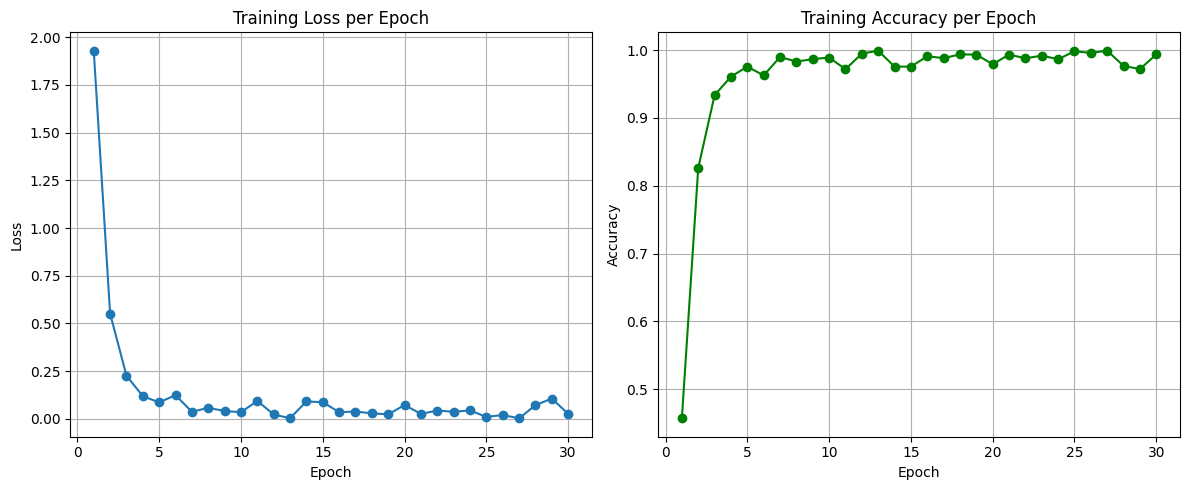

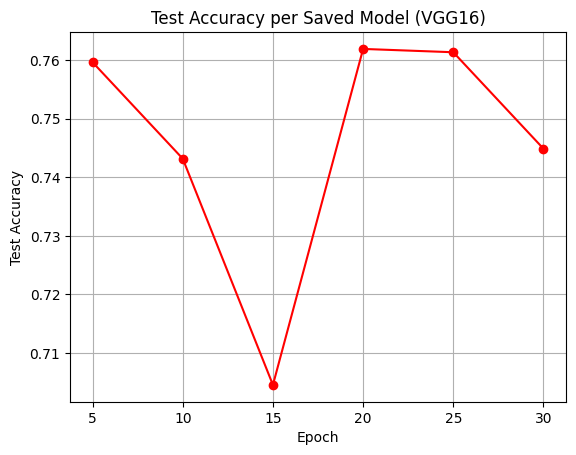

vgg16_epoch10.pth - Validation Accuracy: 0.7677
vgg16_epoch15.pth - Validation Accuracy: 0.7485
vgg16_epoch20.pth - Validation Accuracy: 0.6983
vgg16_epoch25.pth - Validation Accuracy: 0.7706
vgg16_epoch30.pth - Validation Accuracy: 0.7655
vgg16_epoch5.pth - Validation Accuracy: 0.7375

✅ Best Model: check_improve-vgg\vgg16_epoch25.pth (Epoch 25) - Validation Accuracy: 0.7706

=== Evaluating Best Model on Test Set ===
Best Model Test Accuracy: 0.7619


In [1]:
import os
import glob
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

# ==== 路径设置 ====
data_dir = ""  # 填入数据路径，如 "data/fish"
model_dir = "check_improve-vgg"
log_path = "log_improve_vgg.txt"
os.makedirs(model_dir, exist_ok=True)
open(log_path, "w").close()  # 清空旧日志

# ==== 日志函数 ====
def write_log(msg):
    timestamp = f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}]"
    full_msg = f"{timestamp} {msg}"
    with open(log_path, "a") as f:
        f.write(full_msg + "\n")
    print(full_msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'train_improve-2'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32)

class_names = train_loader.dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 训练参数 ====
num_epochs = 30
save_every = 5
train_losses = []
train_accuracies = []

# ==== 训练模型 ====
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    write_log(f"--- Epoch [{epoch+1}/{num_epochs}] ---")
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    write_log(f"Epoch [{epoch+1}/{num_epochs}] Complete - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # 保存模型
    if (epoch + 1) % save_every == 0:
        save_path = os.path.join(model_dir, f"vgg16_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

# ==== 评估函数 ====
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 测试所有模型并绘图 ====
test_accuracies = []
write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

# 重新初始化模型结构
model_eval = models.vgg16(pretrained=False)
model_eval.classifier[6] = nn.Linear(4096, len(class_names))
model_eval = model_eval.to(device)

for path in pth_files:
    model_eval.load_state_dict(torch.load(path, map_location=device))
    acc = evaluate_model(model_eval, test_loader)
    test_accuracies.append(acc)
    write_log(f"{os.path.basename(path)} - Test Accuracy: {acc:.4f}")

# ==== 绘图 ====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("train_loss_accuracy_curve_vgg.png")
plt.show()

plt.figure()
plt.plot(range(save_every, save_every * len(test_accuracies) + 1, save_every), test_accuracies, marker='o', color='red')
plt.title("Test Accuracy per Saved Model (VGG16)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.savefig("test_accuracy_curve_vgg.png")
plt.show()

# ==== 评估最佳模型 ====
# 找到所有保存的.pth文件
model_paths = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

best_model = None
best_val_acc = 0
best_epoch = 0

for path in model_paths:
    model_eval.load_state_dict(torch.load(path, map_location=device))
    val_acc = evaluate_model(model_eval, val_loader)
    
    print(f"{os.path.basename(path)} - Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = path
        best_epoch = int(path.split("_epoch")[1].split(".pth")[0])

# 输出最佳模型信息
print(f"\n✅ Best Model: {best_model} (Epoch {best_epoch}) - Validation Accuracy: {best_val_acc:.4f}")

# ==== 评估最佳模型在测试集上的准确率 ====
print("\n=== Evaluating Best Model on Test Set ===")
model_eval.load_state_dict(torch.load(best_model, map_location=device))
test_acc = evaluate_model(model_eval, test_loader)
print(f"Best Model Test Accuracy: {test_acc:.4f}")

增强之后十分之一训练集（多种增强方法）

In [1]:
import os
import glob
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

# ==== 路径设置 ====
data_dir = ""  # 填入数据路径，如 "data/fish"
model_dir = "check_improve-strong-vgg"
log_path = "log_improve_vgg.txt"
os.makedirs(model_dir, exist_ok=True)
open(log_path, "w").close()  # 清空旧日志

# ==== 日志函数 ====
def write_log(msg):
    timestamp = f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}]"
    full_msg = f"{timestamp} {msg}"
    with open(log_path, "a") as f:
        f.write(full_msg + "\n")
    print(full_msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'train_aug_strong'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32)

class_names = train_loader.dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 训练参数 ====
num_epochs = 5
save_every = 5
train_losses = []
train_accuracies = []

# ==== 训练模型 ====
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    write_log(f"--- Epoch [{epoch+1}/{num_epochs}] ---")
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    write_log(f"Epoch [{epoch+1}/{num_epochs}] Complete - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # 保存模型
    if (epoch + 1) % save_every == 0:
        save_path = os.path.join(model_dir, f"vgg16_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

# ==== 评估函数 ====
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 测试所有模型并绘图 ====
test_accuracies = []
write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

# 重新初始化模型结构
model_eval = models.vgg16(pretrained=False)
model_eval.classifier[6] = nn.Linear(4096, len(class_names))
model_eval = model_eval.to(device)

for path in pth_files:
    model_eval.load_state_dict(torch.load(path, map_location=device))
    acc = evaluate_model(model_eval, test_loader)
    test_accuracies.append(acc)
    write_log(f"{os.path.basename(path)} - Test Accuracy: {acc:.4f}")

# ==== 绘图 ====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("train_loss_accuracy_curve_vgg.png")
plt.show()

plt.figure()
plt.plot(range(save_every, save_every * len(test_accuracies) + 1, save_every), test_accuracies, marker='o', color='red')
plt.title("Test Accuracy per Saved Model (VGG16)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.savefig("test_accuracy_curve_vgg.png")
plt.show()

# ==== 评估最佳模型 ====
# 找到所有保存的.pth文件
model_paths = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

best_model = None
best_val_acc = 0
best_epoch = 0

for path in model_paths:
    model_eval.load_state_dict(torch.load(path, map_location=device))
    val_acc = evaluate_model(model_eval, val_loader)
    
    print(f"{os.path.basename(path)} - Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = path
        best_epoch = int(path.split("_epoch")[1].split(".pth")[0])

# 输出最佳模型信息
print(f"\n✅ Best Model: {best_model} (Epoch {best_epoch}) - Validation Accuracy: {best_val_acc:.4f}")

# ==== 评估最佳模型在测试集上的准确率 ====
print("\n=== Evaluating Best Model on Test Set ===")
model_eval.load_state_dict(torch.load(best_model, map_location=device))
test_acc = evaluate_model(model_eval, test_loader)
print(f"Best Model Test Accuracy: {test_acc:.4f}")

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[2025-05-03 20:38:17] --- Epoch [1/5] ---


Training Epoch 1:   1%|▎                     | 2/152 [00:17<22:11,  8.88s/it, acc=0.0469, loss=3.48]


KeyboardInterrupt: 